<a href="https://colab.research.google.com/github/Arjun-RY/Carvana-Used-Car_price-prediction/blob/main/Used_Car_Price_Prediction(Carvana).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [3]:
df = pd.read_csv('carvana.csv', index_col=False)
df

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [8]:
df.describe().round(2)

,Year,Miles,Price
count,22000.00,22000.00,22000.00
mean,194664.82,54445.70,20707.29
std,1630370.20,25685.93,6535.58
min,2009.00,53.00,10990.00
25%,2014.00,35512.00,16590.00
50%,2017.00,51890.00,19590.00
75%,2020.00,73191.00,22990.00
max,20223500.00,120167.00,102990.00


Year values seems to be wrong(more than 2023)

In [11]:
df[df['Year']>2023].head(5)

,Name,Year,Miles,Price,Car_company
4,BMW X,20173,68992,22990,BMW
31,Mitsubishi Mirage G,20194,24065,15990,Mitsubishi
34,MAZDA CX-,20165,66644,18590,MAZDA
39,MAZDA MAZDA,20133,100316,12990,MAZDA
46,FIAT,2013500,44087,15990,FIAT


In [12]:
def keep_first_four(x):
  return int(str(x)[:4])

df['Year']=df['Year'].apply(keep_first_four)

In [15]:
df[(df['Year']<2009) | (df['Year']>2023)].count()

Name           0
Year           0
Miles          0
Price          0
Car_company    0
dtype: int64

In [9]:
df['Car_company']=df['Name'].apply(lambda x: x.split()[0])
df.head()

,Name,Year,Miles,Price,Car_company
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,20173,68992,22990,BMW


In [19]:
df.nunique()

Name            416
Year             15
Miles          8836
Price           866
Car_company      40
dtype: int64

In [21]:
df.describe()

,Year,Miles,Price
count,22000.000000,22000.000000,22000.000000
mean,2016.113545,54445.697318,20707.285136
std,3.010357,25685.933926,6535.580304
min,2009.000000,53.000000,10990.000000
25%,2014.000000,35512.000000,16590.000000
50%,2016.000000,51890.000000,19590.000000
75%,2019.000000,73191.000000,22990.000000
max,2023.000000,120167.000000,102990.000000


In [72]:
df1=pd.read_csv('carvana.csv', index_col=False)
df1.corr()

,Year,Miles,Price
Year,1.000000,-0.028941,0.141570
Miles,-0.028941,1.000000,-0.474124
Price,0.141570,-0.474124,1.000000


In [26]:
df[df['Name']==' BMW X']

,Name,Year,Miles,Price,Car_company
4,BMW X,2017,68992,22990,BMW
805,BMW X,2016,75099,22990,BMW
970,BMW X,2016,58427,24590,BMW
1741,BMW X,2016,60615,23990,BMW
1758,BMW X,2014,53465,23590,BMW
...,...,...,...,...,...
21840,BMW X,2015,35706,22990,BMW
21908,BMW X,2015,35706,22990,BMW
21930,BMW X,2015,35706,22990,BMW
21952,BMW X,2015,35706,22990,BMW


In [27]:
df=pd.get_dummies(df,columns=['Name'])

In [45]:
df2=df.copy()

In [46]:
df2['Year']=2023-df2['Year']

In [49]:
df2

,Year,Miles,Price,Car_company,Name_ Acura ILX,Name_ Acura MDX,Name_ Acura MDX Sport Hybrid,Name_ Acura RDX,Name_ Acura RLX,Name_ Acura TL,...,Name_ Volkswagen Touareg,Name_ Volkswagen e-Golf,Name_ Volvo C,Name_ Volvo S,Name_ Volvo V,Name_ Volvo XC,Name_ smart fortwo,Name_ smart fortwo electric drive,Name_ smart fortwo electric drive cabrio,Name_Kia Sorento
0,2018,41946,16990,Chevrolet,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,45328,23990,GMC,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,81068,21590,Jeep,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,35372,21590,Jeep,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,68992,22990,BMW,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,2014,98085,17590,Honda,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21996,2016,62616,23990,Dodge,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21997,2013,50345,16990,Ford,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21998,2020,27945,23990,Toyota,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df2=pd.get_dummies(df,columns=['Car_company'])
df2.shape

(22000, 459)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

linear_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dtree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gboost = GradientBoostingRegressor()
xgb = XGBRegressor()

models = {'Linear': linear_reg, 'Ridge': ridge, 'Lasso': lasso, 'Decision Tree': dtree,
          'Random Forest': rf, 'Gradient Boosting': gboost, 'XGBoost': xgb}
metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R2'])

# Iterate through the models
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Print the evaluation metrics
    metrics = metrics.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R2': r2}, ignore_index=True)
    print(f'{name} MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}')

Linear MAE: 282976932488814.1250, MSE: 77800380414761316764284060958720.0000, R2: -1936364587728303521005568.0000
Ridge MAE: 1318.5970, MSE: 4827784.4443, R2: 0.8798
Lasso MAE: 1316.4153, MSE: 4786303.2192, R2: 0.8809
Decision Tree MAE: 710.1339, MSE: 5716968.5570, R2: 0.8577
Random Forest MAE: 726.1704, MSE: 3965263.4620, R2: 0.9013
Gradient Boosting MAE: 2369.8271, MSE: 12485262.0430, R2: 0.6893
[12:58:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost MAE: 2356.1494, MSE: 12507398.4949, R2: 0.6887


               Model           MAE           MSE            R2
0             Linear  2.829769e+14  7.780038e+31 -1.936365e+24
1              Ridge  1.318597e+03  4.827784e+06  8.798418e-01
2              Lasso  1.316415e+03  4.786303e+06  8.808743e-01
3      Decision Tree  7.101339e+02  5.716969e+06  8.577110e-01
4      Random Forest  7.261704e+02  3.965263e+06  9.013090e-01
5  Gradient Boosting  2.369827e+03  1.248526e+07  6.892558e-01
6            XGBoost  2.356149e+03  1.250740e+07  6.887048e-01


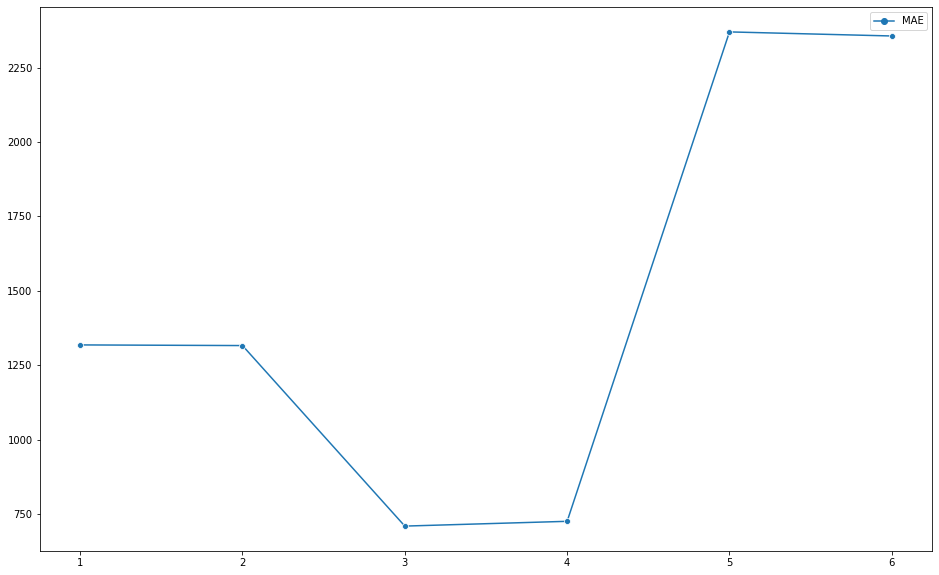

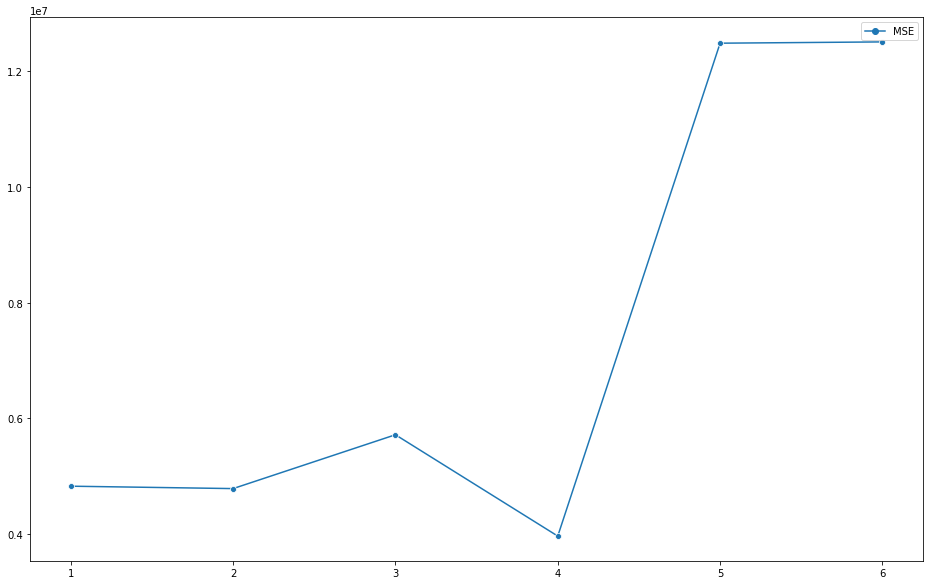

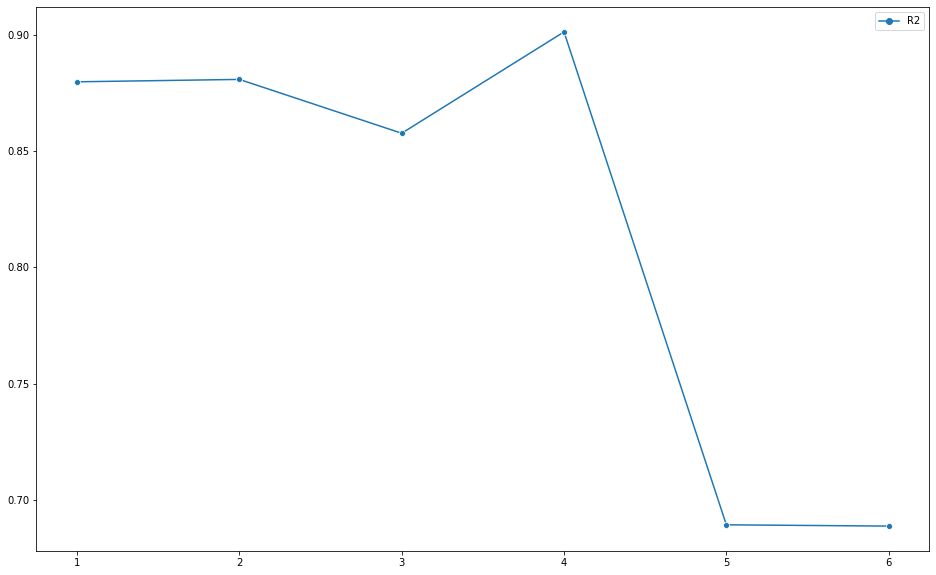

In [76]:
print(metrics)
plt.figure(figsize=(16,10))
sns.lineplot(data=metrics.iloc[1:,[1]],markers=True)
plt.figure(figsize=(16,10))
sns.lineplot(data=metrics.iloc[1:,[2]],markers=True)
plt.figure(figsize=(16,10))
sns.lineplot(data=metrics.iloc[1:,[3]],markers=True)

Feature Importance

In [80]:
coefficients=rf.feature_importances_
feature_names=list(X.columns)
feature_importances = pd.DataFrame({'feature':feature_names,
                                    'feature_importance':coefficients})
feature_importances

,feature,feature_importance
0,Year,0.283684
1,Miles,0.145223
2,Name_ Acura ILX,0.000034
3,Name_ Acura MDX,0.000992
4,Name_ Acura MDX Sport Hybrid,0.000213
...,...,...
453,Car_company_Tesla,0.070911
454,Car_company_Toyota,0.002061
455,Car_company_Volkswagen,0.000687
456,Car_company_Volvo,0.002413
